<a href="https://colab.research.google.com/github/hossein20s/kwh_prediction/blob/master/kwh_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition
Check it out from 
https://docs.google.com/document/d/1-ceuHfJ2bNbgmKddLTUCS0HJ1juE5t0042Mts_yEUD8v

# Connecting Colab to GDrive
Connecting colab to GDrive as I kept the data there

In [0]:
!pip install fbprophet
!pip install pystan

In [0]:
from google.colab import drive
drive.mount('/gdrive')
!ln -s "/gdrive/My Drive/data" data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
ln: failed to create symbolic link 'data/data': Function not implemented


# DATA ans SRC Acquisition
Checking out the code from Github

In [140]:
!git clone https://github.com/hossein20s/kwh_prediction
!cd kwh_prediction; git pull
import sys
sys.path.append('kwh_prediction')
import importlib
import power_predictor
importlib.reload(power_predictor)

fatal: destination path 'kwh_prediction' already exists and is not an empty directory.
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/hossein20s/kwh_prediction
   9ba8953..4e97a6a  master     -> origin/master
Updating 9ba8953..4e97a6a
Fast-forward
 power_predictor.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


<module 'power_predictor' from 'kwh_prediction/power_predictor.py'>

# Data Exploration
some OS level cehcking the data size 

In [0]:
!wc -l data/load_temperature_data.csv

45506 data/load_temperature_data.csv


Conver it to Pandas Dataframe, check its shape a normalize it and add proper column names and index. All dont in __init__ method of class

In [141]:
import pandas as pd
from power_predictor import PowerForecaster, Models, Constants, ColumnNames
from test_power_predictor import TestPowerForecaster

DATA_FILE = 'data/load_temperature_data.csv'
df = pd.read_csv(DATA_FILE)
forecaster = PowerForecaster(df) # check out __init__ method in the imported class

First 3 rows:                                     Unnamed: 0   y  ...  month                  ds
2012-11-01 01:00:00  2012-11-01 01:00:00-07:00 NaN  ...     11 2012-11-01 01:00:00
2012-11-01 01:15:00  2012-11-01 01:15:00-07:00 NaN  ...     11 2012-11-01 01:15:00
2012-11-01 01:30:00  2012-11-01 01:30:00-07:00 NaN  ...     11 2012-11-01 01:30:00

[3 rows x 8 columns]
____________________________________________________________________________________________________
Sample of one element Unnamed: 0            2012-11-01 01:00:00-07:00
y                                           NaN
actual_temperature                     0.378607
date                                 2012-11-01
time                                   01:00:00
dow                                           3
month                                        11
ds                          2012-11-01 01:00:00
Name: 2012-11-01 01:00:00, dtype: object
____________________________________________________________________________________

kwh_prediction/power_predictor.py:101: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Visual Inspection and Sanity Check

Seasional and Hour of day patterns can be seen in the data. We interpolated temperature using Facebook Prophet package

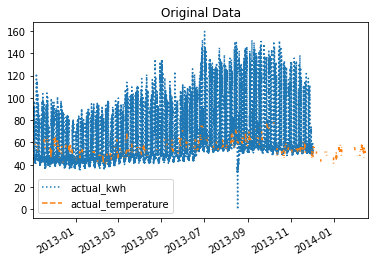

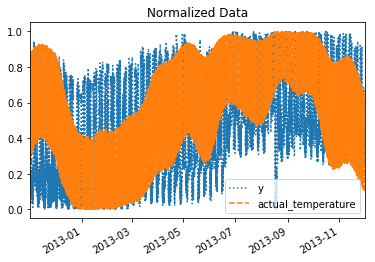

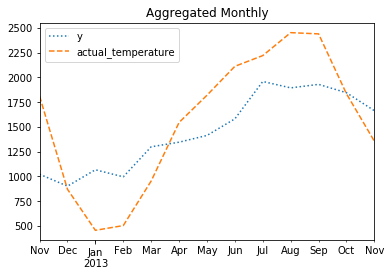

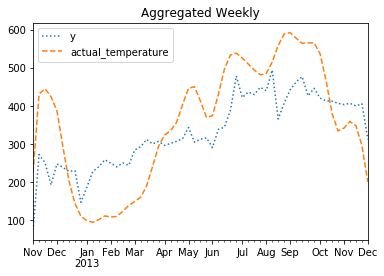

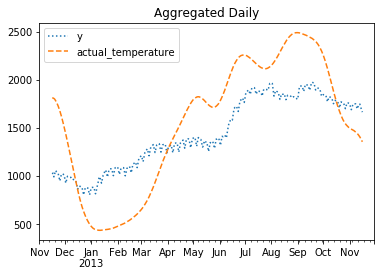

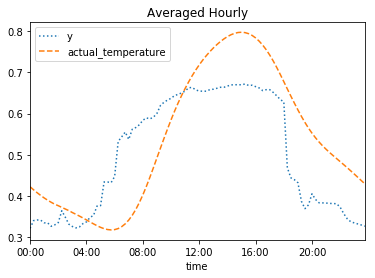

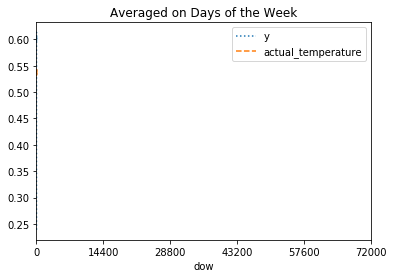

In [0]:
forecaster.visual_inspection()

# Model 1: Facebook Prophet 

In [0]:
forecaster.fit()
print("done fitting, forecasting ...")
predicted = forecaster.predict()

done fitting, forecasting ...


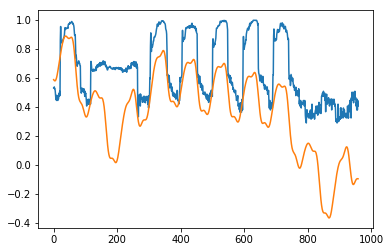

In [0]:
forecaster.plot_prediction(predicted)

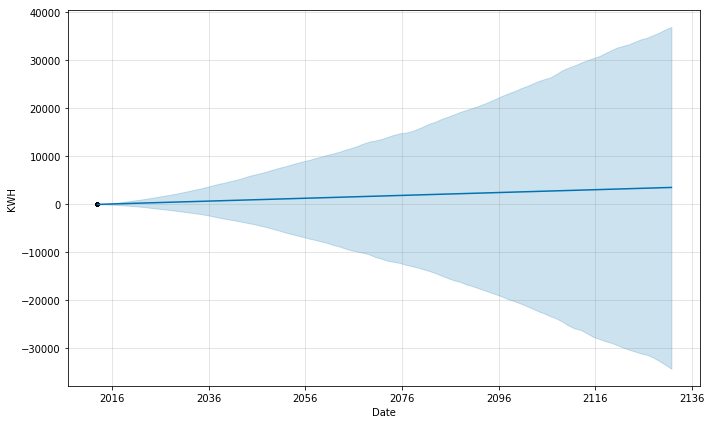

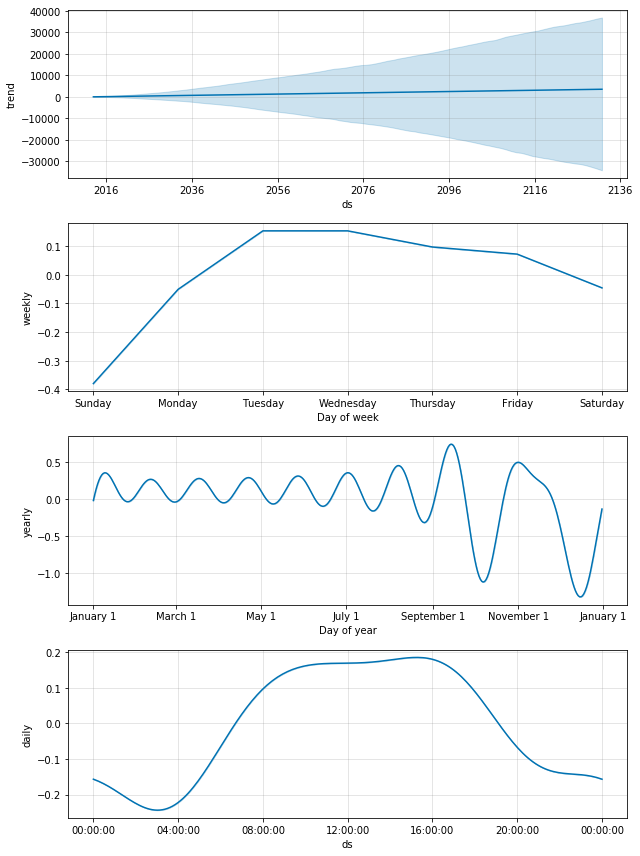

In [0]:
forecaster.plot_future(predicted)

# Model 2: ARIMA

In [99]:
forecaster.model = Models.ARIMA
forecaster.fit()
print("fitted")
predictor = forecaster.predict()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



SARIMAX fitting ....


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



SARIMAX forecast 3792    0.812626
dtype: float64
fitted
2012-11-30 12:00:00 2012-12-10 11:45:00


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



(960, 23)


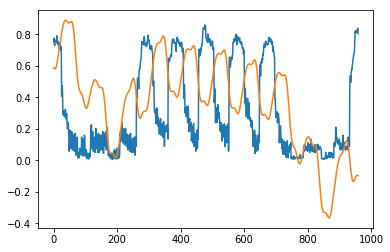

In [96]:
print(predicted.shape)
import matplotlib.pyplot as plt

plt.plot(predicted.index, forecaster.train_y['y'].iloc[-960:], predicted['y'])
plt.show()

# Model 3: VAR (Multivariat)

In [142]:
forecaster.model = Models.VAR
forecaster.fit()
print('fitted')
predicted = forecaster.predict()

making VAR model
VAR fitting ....
fitted


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency 15T will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning:

y is a deprecated alias for endog, will be removed in version 0.11.0



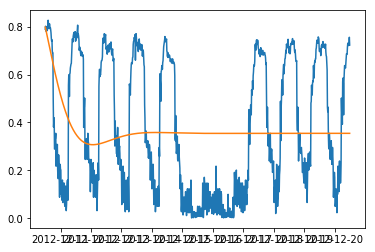

In [143]:
#print(predicted)
forecaster.plot_prediction(predicted)

# Model 4: LSTM

In [0]:
forecaster.lstm_preprocess(forecaster.df, 'H')
forecaster.fit()

                     x1(t-1)   x2(t-1)  y1(t)     y2(t)
2012-11-01 02:00:00      0.0  1.476004    0.0  1.391604
2012-11-01 03:00:00      0.0  1.391604    0.0  1.315526
2012-11-01 04:00:00      0.0  1.315526    0.0  1.229598
2012-11-01 05:00:00      0.0  1.229598    0.0  1.163643
2012-11-01 06:00:00      0.0  1.163643    0.0  1.185917


ValueError: ignored

In [0]:
forecaster.stationary_test()


array([0.04886238, 0.00424556])

dict_keys(['loss', 'val_loss'])


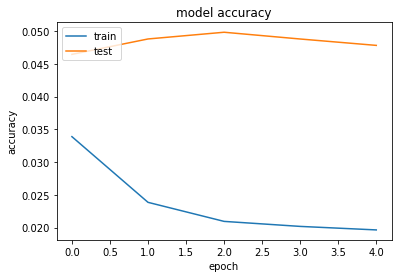

In [0]:
print(forecaster.history.keys())

import matplotlib.pyplot as plt

plt.plot(forecaster.history['loss'])
plt.plot(forecaster.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [0]:
#plt.plot(predicted.index, forecaster.test_y[ColumnNames.LABELS.value].iloc[:len(predicted)], predicted[ColumnNames.LABELS.value])
#plt.show()
print(predicted.shape)
print(forecaster.future.shape)
print(forecaster.future)

(96, 23)
(96, 1)
                    ds
0  2012-12-31 11:45:00
1  2014-03-31 11:45:00
2  2015-06-30 11:45:00
3  2016-09-30 11:45:00
4  2017-12-31 11:45:00
5  2019-03-31 11:45:00
6  2020-06-30 11:45:00
7  2021-09-30 11:45:00
8  2022-12-31 11:45:00
9  2024-03-31 11:45:00
10 2025-06-30 11:45:00
11 2026-09-30 11:45:00
12 2027-12-31 11:45:00
13 2029-03-31 11:45:00
14 2030-06-30 11:45:00
15 2031-09-30 11:45:00
16 2032-12-31 11:45:00
17 2034-03-31 11:45:00
18 2035-06-30 11:45:00
19 2036-09-30 11:45:00
20 2037-12-31 11:45:00
21 2039-03-31 11:45:00
22 2040-06-30 11:45:00
23 2041-09-30 11:45:00
24 2042-12-31 11:45:00
25 2044-03-31 11:45:00
26 2045-06-30 11:45:00
27 2046-09-30 11:45:00
28 2047-12-31 11:45:00
29 2049-03-31 11:45:00
..                 ...
66 2095-06-30 11:45:00
67 2096-09-30 11:45:00
68 2097-12-31 11:45:00
69 2099-03-31 11:45:00
70 2100-06-30 11:45:00
71 2101-09-30 11:45:00
72 2102-12-31 11:45:00
73 2104-03-31 11:45:00
74 2105-06-30 11:45:00
75 2106-09-30 11:45:00
76 2107-12-31 11:

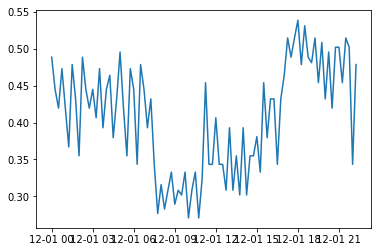

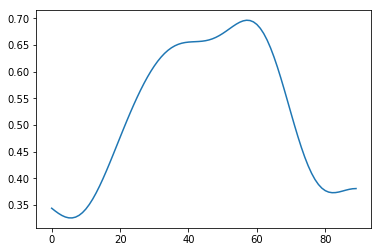

In [0]:
#print(prophetised.columns)
import matplotlib.pyplot as plt
#plt.plot(df['actual_temperature'][0:10100])
plt.plot(forecaster.testing.actual_kwh[:90])
plt.show()
plt.plot(prophetised.yhat[:90])
#plt.plot(prophetised)
plt.show()

In [0]:
import pickle

with open("data/t.df", "wb") as file:
    pickle.dump(prophetised, file)

In [0]:
predictor.model.fit(predictor.df_normalized)
valid_ds = predictor.get_validation_date_set()
predicted = predictor.model.predict(valid_ds)


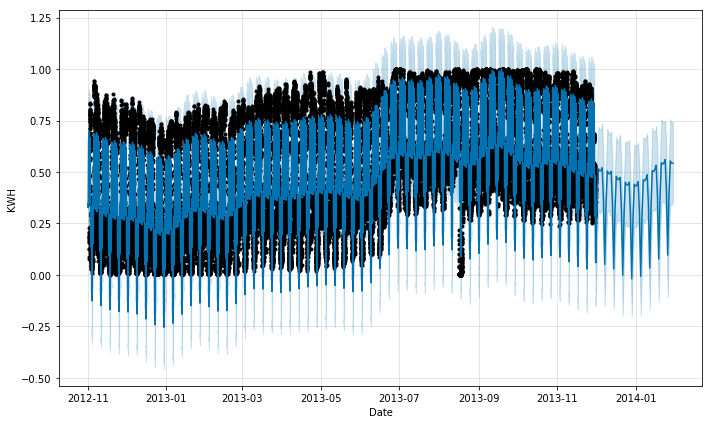

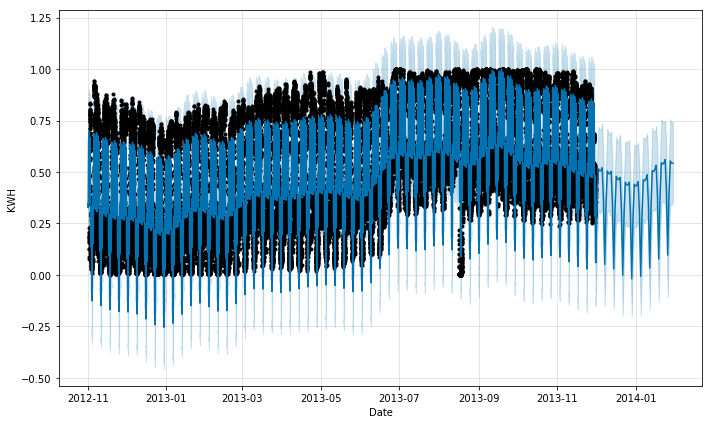

In [0]:
predictor.model.plot(predicted, xlabel='Date', ylabel='KWH')


In [0]:
predicted.shape

(37980, 22)

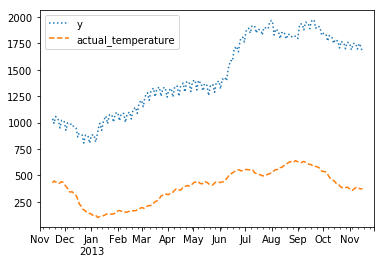

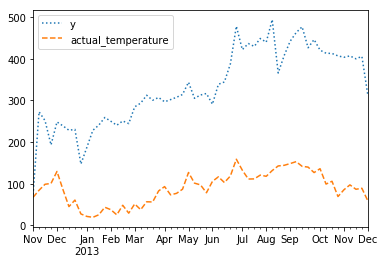

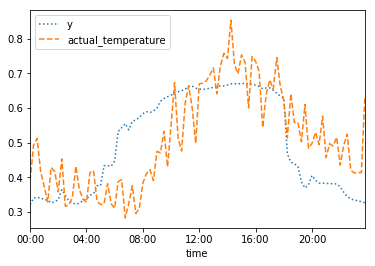

In [0]:
predictor.agg_plot()

*  Take a look at the first couple of lines 
*  If it has any missing data: *It didn’t*
*  Some statistics on the df: *Sparse data*




**Find out the size of not null data**

# Data Transformation & Cleaning

In [0]:
normalize_columns = [FEATURE_COLUMN_NAME, LABEL_COLUMN_NAME]

def scale(df, columns):
  from sklearn.preprocessing import QuantileTransformer
  scaled_one = QuantileTransformer().fit_transform(df[normalize_columns])
  df_scaled = pd.DataFrame(df)
  df_scaled[columns] = scaled_one
  return df_scaled


df[DATE_TIME_COLUMN] = pd.to_datetime(df[DATE_COLUMN]+df[TIME_COLUMN],
                                      format='%Y-%m-%d%H:%M:%S', errors='raise')

#remove any dates after 12/1/13
cutoff_date = pd.to_datetime('12/01/13', format="%m/%d/%y")
print(">>", df.shape)
df_limited = df[df[DATE_TIME_COLUMN] < cutoff_date]
print(df_limited.shape)

df_limited.set_index(DATE_TIME_COLUMN, inplace=True)

df_scaled = scale(df_limited, normalize_columns)
print(df_scaled.index)

df_notnull = df_scaled[df_scaled[FEATURE_COLUMN_NAME].notnull()]
print("Size of df that has power information", df_notnull.shape)

kwh_outliers = detect_outlier(df_notnull[FEATURE_COLUMN_NAME])
print("number of outliers in kwh", len(kwh_outliers))

df_clean_kwh = df_notnull[ ~df_notnull[FEATURE_COLUMN_NAME].isin(kwh_outliers)]

print("After removing outliers:", df_clean_kwh.shape)
df_tmp = df_notnull #df_clean_kwh

df_temp = df_tmp[df_tmp[LABEL_COLUMN_NAME].notnull()]
print('Size of data that has valid temerature (label)', df_temp.shape)

temp_outliers = detect_outlier(df_temp[LABEL_COLUMN_NAME])
print("Number of outliers in temperature", len(temp_outliers))
df_for_training_unscaled = df_temp[ ~df_temp[LABEL_COLUMN_NAME].isin(temp_outliers)]

df_for_training = scale(df_for_training_unscaled, normalize_columns)
df_temp_missing_data = scale(df_temp, normalize_columns)


>> (45505, 8)
(37920, 8)
DatetimeIndex(['2012-11-01 01:00:00', '2012-11-01 01:15:00',
               '2012-11-01 01:30:00', '2012-11-01 01:45:00',
               '2012-11-01 02:00:00', '2012-11-01 02:15:00',
               '2012-11-01 02:30:00', '2012-11-01 02:45:00',
               '2012-11-01 03:00:00', '2012-11-01 03:15:00',
               ...
               '2013-11-30 21:30:00', '2013-11-30 21:45:00',
               '2013-11-30 22:00:00', '2013-11-30 22:15:00',
               '2013-11-30 22:30:00', '2013-11-30 22:45:00',
               '2013-11-30 23:00:00', '2013-11-30 23:15:00',
               '2013-11-30 23:30:00', '2013-11-30 23:45:00'],
              dtype='datetime64[ns]', name='datetime', length=37920, freq=None)
Size of df that has power information (37819, 7)
number of outliers in kwh 0
After removing outliers: (37819, 7)
Size of data that has valid temerature (label) (10216, 7)
Number of outliers in temperature 0


# Exploring the correlation, behavior and missing data

Lets plot one case and couple of feature to see if any pattern can be detected by eye. There is an imbalance between response 1 and 0 but it is not much. Looks like other values are all 0 or 1

                     actual_kwh  actual_temperature
datetime                                           
2012-12-15 13:00:00    0.010010            0.094094
2012-11-17 15:30:00    0.103604            0.705706
2013-09-13 17:00:00    0.950450            0.768769
2013-03-20 00:00:00    0.288789            0.260761
2013-03-13 17:45:00    0.863864            0.929429
2013-09-14 16:15:00    0.694194            0.852352
2013-01-29 23:00:00    0.206707            0.094094
2012-12-14 07:00:00    0.492492            0.066066
2012-12-11 17:00:00    0.677177            0.362863
2013-11-08 03:00:00    0.395896            0.260761


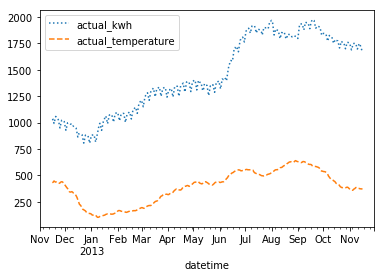

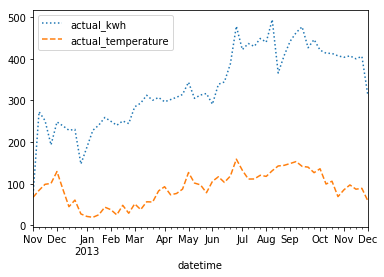

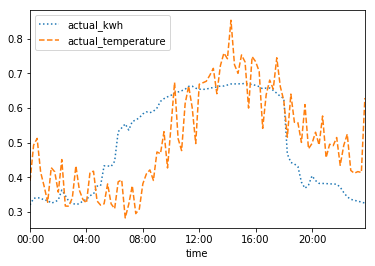

'\nplotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")\nplotter.plot(df_scaled.loc[\'2012-11-5\':\'2012-11-12\'][normalize_columns])\nplt.show()\n\nplotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")\nplotter.plot(df_scaled.loc[\'2012-11\'][normalize_columns])\nplt.show()\n\nplotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")\nplotter.plot(df_scaled.loc[\'2012\'][normalize_columns])\nplt.show()\n\n# power is measured every 15 minutes. Lets check out daily, weekly, weekends and seasonal behaviors\n# daily = 24 * 4 = 96\ndf_scaled[\'F_MA\'] = df_scaled[FEATURE_COLUMN_NAME].rolling(window=100).mean()\n\nplotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")\nplotter.plot(df_scaled[\'F_MA\'][10000:15000])\nplt.show()\n'

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters

print(df_for_training.sample(random_state=1, frac=.001)[[FEATURE_COLUMN_NAME, LABEL_COLUMN_NAME]])

style = [':','--','-']

def get_plotter(title, ylabel):
  register_matplotlib_converters()
  years = mdates.YearLocator()   # every year
  months = mdates.MonthLocator()  # every month
  yearsFmt = mdates.DateFormatter('%Y')


  # Create the plot space upon which to plot the data
  fig, ax = plt.subplots(figsize=(10, 10))

  # Set title and labels for axes
  ax.set(xlabel="Date",
        ylabel=ylabel,
        title=title)
  # format the ticks
  ax.xaxis.set_major_locator(years)
  ax.xaxis.set_major_formatter(yearsFmt)
  ax.xaxis.set_minor_locator(months)
  #ax.xaxis.xticks(rotation=70)
  fig.autofmt_xdate()
  return ax

plotter = get_plotter("","")
plotter.plot(forecaster.df)
"""
plotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")
plotter.plot(df_for_training[normalize_columns])
plt.show()

plotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")
plotter.plot(df_scaled[normalize_columns])
plt.show()
"""
daily = df_scaled.resample('D').sum()[normalize_columns]
daily.rolling(30, center=True).sum().plot(style=style)
plt.show()

weekly = df_scaled.resample('W').sum()[normalize_columns]
weekly.plot(style=style)
plt.show()

bytime = df_scaled.groupby(by=df_scaled.index.time).mean()[normalize_columns]
hourly_ticks = 4 * 60 * 60 * np.arange(6)
bytime.plot(xticks=hourly_ticks, style=style)
plt.show()
"""
plotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")
plotter.plot(df_scaled.loc['2012-11-5':'2012-11-12'][normalize_columns])
plt.show()

plotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")
plotter.plot(df_scaled.loc['2012-11'][normalize_columns])
plt.show()

plotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")
plotter.plot(df_scaled.loc['2012'][normalize_columns])
plt.show()

# power is measured every 15 minutes. Lets check out daily, weekly, weekends and seasonal behaviors
# daily = 24 * 4 = 96
df_scaled['F_MA'] = df_scaled[FEATURE_COLUMN_NAME].rolling(window=100).mean()

plotter = get_plotter("Correlation between power usage and temperature", "Normalized Temperature")
plotter.plot(df_scaled['F_MA'][10000:15000])
plt.show()
"""

As we can see some correlation power consumption and temperature. Lets calculate their covariance and correation coefficients

In [0]:
print("Covariance:\n", df_for_training[normalize_columns].cov(), SEP)
print('Pearson correlation function:\n', df_for_training[normalize_columns].corr())

Covariance:
                     actual_kwh  actual_temperature
actual_kwh            0.083364            0.038376
actual_temperature    0.038376            0.083296 
____________________________________________________________________________________________________
Pearson correlation function:
                     actual_kwh  actual_temperature
actual_kwh            1.000000            0.460525
actual_temperature    0.460525            1.000000
